<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>

---

# Assignment 1

by Ahmat Zainul Muttaqin

PYTN-KS19

Studi Independen - Kampus Merdeka

## Project Overview

The aim of this projects is to introduce you to data visualization with Python as concrete and as consistent as possible. Using what you’ve learned; download the London Crime Dataset from Kaggle. This dataset is a record of crime in major metropolitan areas, such as London, occurs in distinct patterns. This data covers the number of criminal reports by month, LSOA borough, and major/minor category from Jan 2008-Dec 2016.


This dataset contains:


- lsoa_code: this represents a policing area
- borough: the london borough for which the statistic is related
- major_category: the major crime category
- minor_category: the minor crime category
- value: the count of the crime for that particular borough, in that particular month
- year: the year of the summary statistic
- month: the month of the summary statistic


Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. And the important things, Visualized the data. Examples of questions can be:

- What is the change in the number of crime incidents from 2011 to 2016?
- What were the top 3 crimes per borough in 2016?

## Import Library

We have to import required libraries before starting this project.

In [6]:
import numpy as np              # Useful for various scientific computations in Python
import folium                   # Library for creating interactive maps
import pandas as pd             # Library for handling primary data structures
import matplotlib as mpl        # Additional plotting customization
import matplotlib.pyplot as plt # Plotting data
from wordcloud import WordCloud, STOPWORDS # Text visualization
from PIL import Image           # Image processing

# Enable inline plotting for Jupyter notebooks
%matplotlib inline

print('All necessary libraries have been loaded!')

All necessary libraries have been loaded!


## Import Dataset

Dataset is about London Crime Data 2008-2016, Download from Kaggle [Here](https://www.kaggle.com/jboysen/london-crime)

Dataset file must in the same folder with this file. Load the dataset from a CSV file into a Pandas DataFrame

In [7]:
df = pd.read_csv('london_crime_by_lsoa.csv')
print('The dataset has been successfully loaded!')

The dataset has been successfully loaded!


## Exploratory Data Analysis

Exploring the dataset to gain insights
First, let's view the top 5 rows of the dataset

In [8]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


The dataset contains 7 columns. Display the top 5 rows of the DataFrame

In [12]:
df.tail()

,lsoa_code,borough,major_category,minor_category,value,year,month
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


The dataset has a total of 13,490,604 rows (with the index reaching 13,490,603).

Display information about all columns and their data types

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


By default, there are 3 columns with integer data types.

Display the header list (column names) of the dataset

In [24]:
header_list = df.columns
print('Header List:', header_list)

Header List: Index(['lsoa_code', 'borough', 'major_category', 'minor_category', 'value',
       'year', 'month'],
      dtype='object')


View the index list of the dataset

In [21]:
index_list = df.index
print('Index List:', index_list)

Index List: RangeIndex(start=0, stop=13490604, step=1)


View the shape (dimensions) of the dataset

In [8]:
data_shape = df.shape
print('Dataset Shape:', data_shape)

Dataset Shape: (13490604, 7)


View descriptive statistics for columns with object data type

In [12]:
df.describe(include=['O'])

,lsoa_code,borough,major_category,minor_category
count,13490604,13490604,13490604,13490604
unique,4835,33,9,32
top,E01003689,Croydon,Theft and Handling,Common Assault
freq,3456,602100,3966300,522180


View descriptive statistics for columns with integer data type

In [13]:
df.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


Check for missing values in the dataset

In [16]:
missing_values = df.isna().sum()

print('Missing Values:')
print(missing_values)

Missing Values:
lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64


Check for duplicate data in the dataset

In [44]:
duplicate_data = df[df.duplicated()]

if not duplicate_data.empty:
    print('Duplicate Data:')
    print(duplicate_data)
else:
    print('No duplicate data found.')

No duplicate data found.


View unique value for each columns

In [49]:
unique_values = df.nunique()

print('Number of Unique Values for Each Column:')
print(unique_values)

print('borough: ', df['borough'].unique())
print('major_category: ', df['major_category'].unique())
print('minor_category: ', df['minor_category'].unique())
print('value: ', df['value'].unique())
print('year: ', df['year'].unique())
print('month: ', df['month'].unique())

Number of Unique Values for Each Column:
lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64
borough:  ['Croydon' 'Greenwich' 'Bromley' 'Redbridge' 'Wandsworth' 'Ealing'
 'Hounslow' 'Newham' 'Sutton' 'Haringey' 'Lambeth' 'Richmond upon Thames'
 'Hillingdon' 'Havering' 'Barking and Dagenham' 'Kingston upon Thames'
 'Westminster' 'Hackney' 'Enfield' 'Harrow' 'Lewisham' 'Brent' 'Southwark'
 'Barnet' 'Waltham Forest' 'Camden' 'Bexley' 'Kensington and Chelsea'
 'Islington' 'Tower Hamlets' 'Hammersmith and Fulham' 'Merton'
 'City of London']
major_category:  ['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
minor_category:  ['Burglary in Other Buildings' 'Other violence' 'Personal Property'
 'Other Theft' 'Offensive Weapon' 'Criminal Damage To Other Buildin

## Pre-processing & Visualization

We are going to visualize the dataset, also doing pre-processing data based on the cases.

### Area Plot

Question: Which boroughs have the highest cumulative rate of annual and monthly criminal cases?

Create a required dataframe for area plot

In [92]:
ap1 = df.pivot_table(index='year', columns ='borough', values='value', aggfunc=sum)
ap1

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226
2013,15759,22510,11552,23759,18945,28435,110,27444,25917,21574,...,11595,27577,19793,10439,31128,10057,26258,21903,22290,53852
2014,15426,22572,11844,24426,19668,27198,115,27357,24978,21700,...,11596,28005,19590,10456,28912,10443,25504,20271,21364,47564
2015,16346,24036,11990,24883,20637,29477,151,28089,26247,22076,...,12273,29217,18897,10413,30260,10598,27493,20969,22401,47395
2016,16741,24684,12840,26693,20164,29183,178,28712,27127,22485,...,12755,30090,19502,11074,31636,10658,29253,20716,23679,48330


Create a required dataframe for area plot

In [71]:
ap2 = df.pivot_table(index='month', columns ='borough', values='value', aggfunc=sum)
ap2

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
month,,,,,,,,,,,,,,,,,,,,,
1,12610,17550,9576,18744,15770,22288,58,22198,20398,15888,...,9595,21612,15637,7843,22776,8241,17762,16792,16402,37928
2,12193,16659,8959,17535,14684,21332,56,19986,19629,15667,...,9067,20462,14521,7315,21518,8043,16958,15673,15902,34713
3,13451,18447,10133,19296,15843,24027,49,22015,21401,16966,...,9929,22749,16282,8279,23301,8970,18988,17396,17370,38349
4,12323,17421,9179,18026,14714,22305,53,20954,20416,15731,...,9372,20887,14574,7905,22248,8498,18322,16748,16464,35934
5,12844,17999,9903,19718,15785,24181,61,22169,22067,16680,...,10036,21901,15359,8819,24127,8669,19821,17669,17690,37661
6,12451,17908,9492,19342,15159,23514,52,22376,21753,16683,...,9915,21967,15195,8375,24205,8822,19848,17962,17687,37216
7,13205,18297,9805,19698,16164,24133,53,22629,22557,16628,...,10205,22758,15517,8498,24553,8557,21406,17927,18387,40293
8,12315,16775,9063,18478,14703,21900,75,21623,20806,15445,...,9259,21683,14410,7911,23847,7933,19589,16939,16765,38090
9,11883,16902,9053,18184,14616,21731,90,21255,20249,15447,...,9274,21345,14725,8231,22926,8050,19040,16619,17306,35608


Make sure there is no missing value in dataframe

In [94]:
# Check for missing values in ap1
missing_values_ap1 = ap1.isnull().sum()

if missing_values_ap1.sum() == 0:
    print('No missing values in ap1.')
else:
    print(f'There are {missing_values_ap1.sum()} missing values in ap1.')

# Check for missing values in ap2   
missing_values_ap2 = ap2.isnull().sum()

if missing_values_ap2.sum() == 0:
    print('No missing values in ap2.')
else:
    print(f'There are {missing_values_ap2.sum()} missing values in ap2.')

No missing values in ap1.
No missing values in ap2.


Create area plots

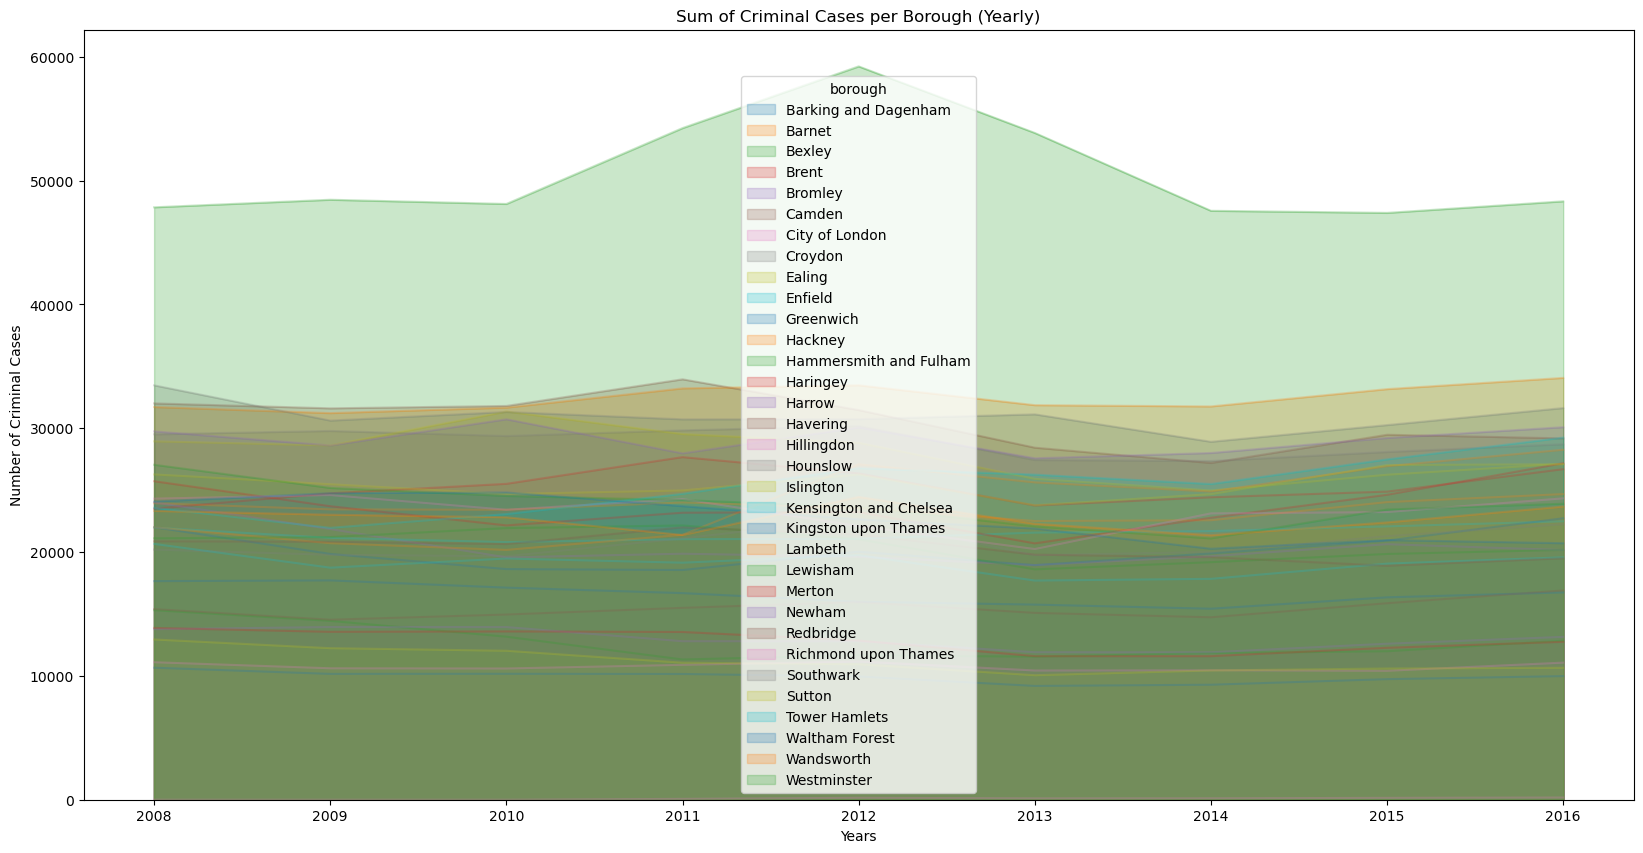

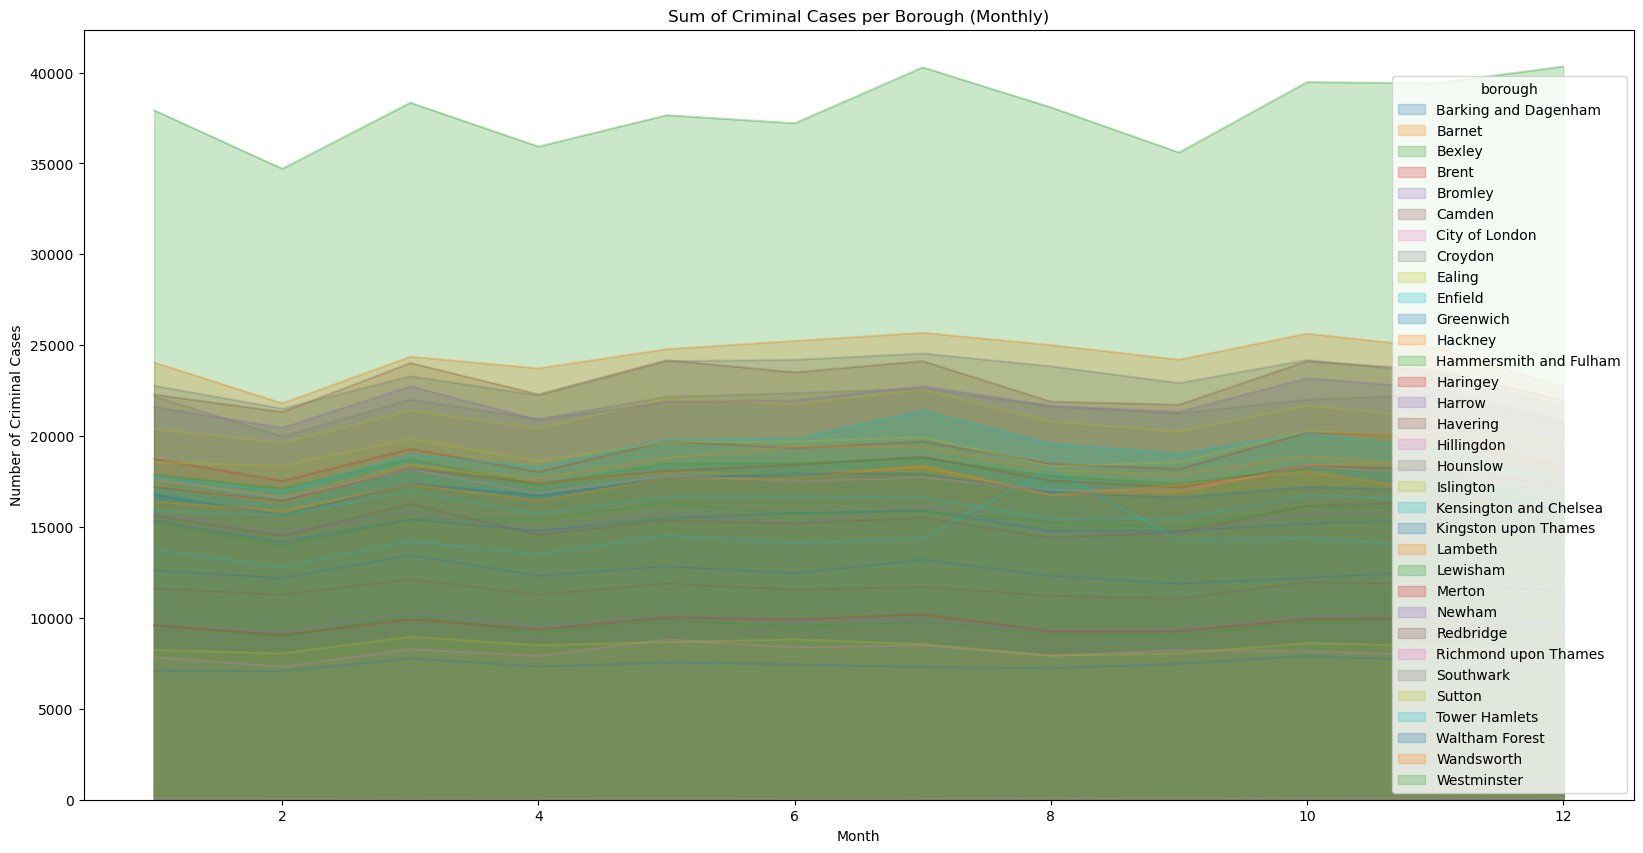

In [78]:
# Create area plot for ap1
ap1.plot(
    kind='area',
    alpha=0.25,
    stacked=False,
    figsize=(20, 10)
)

plt.title('Sum of Criminal Cases per Borough (Yearly)')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Years')
plt.show()

# Create area plot for ap2
ap2.plot(
    kind='area',
    alpha=0.25,
    stacked=False,
    figsize=(20, 10)
)

plt.title('Sum of Criminal Cases per Borough (Monthly)')
plt.ylabel('Number of Criminal Cases')
plt.xlabel('Month')
plt.show()


Insight: From the area plot above, it is evident that Westminster exhibits the highest cumulative rate of criminal cases, both annually and monthly. Furthermore, there was a significant increase in annual cases in 2012, while the monthly data displays fluctuations but remains relatively stable around the mean.

### Histogram

Question: What is the frequency distribution of the top 3 number criminal cases from the London's borough in 2008-2013?

Filter data for histogram

In [108]:
ht1 = df[df['year'] <= 2013]
ht1

,lsoa_code,borough,major_category,minor_category,value,year,month
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
5,E01001320,Ealing,Theft and Handling,Other Theft,0,2012,5
6,E01001342,Ealing,Violence Against the Person,Offensive Weapon,0,2010,7
7,E01002633,Hounslow,Robbery,Personal Property,0,2013,4
8,E01003496,Newham,Criminal Damage,Criminal Damage To Other Building,0,2013,9
...,...,...,...,...,...,...,...
13490595,E01001144,Croydon,Violence Against the Person,Harassment,0,2012,1
13490596,E01000655,Bromley,Theft and Handling,Theft From Shops,0,2010,7
13490598,E01032577,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


Pre-processing the dataset so we have top 3 borough that has highest criminal cases

In [109]:
ht1 = ht1.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
ht1['Total'] = ht1.sum(axis=1)
ht1.sort_values(['Total'], ascending=False, axis=0, inplace=True)
ht1.drop('Total', axis=1, inplace=True)
ht1_top3 = ht1.head(n=3).transpose()
ht1_top3

borough,Westminster,Lambeth,Camden
year,,,
2008,47846,31717,32010
2009,48456,31225,31612
2010,48116,31671,31804
2011,54243,33224,33956
2012,59226,33473,31472
2013,53852,31868,28435


Create a histogram for ht1_top3

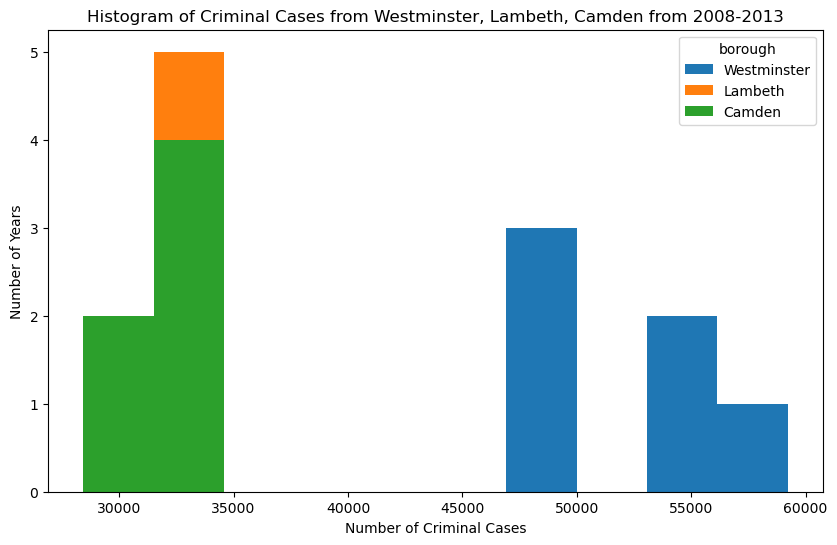

In [110]:
ht1_top3.plot(kind='hist', figsize=(10, 6))
plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')
plt.show()

Calculate histogram values and bin edges


In [117]:
count, bin_edges = np.histogram(ht1_top3, bins=15)

Create an un-stacked histogram with custom bin edges

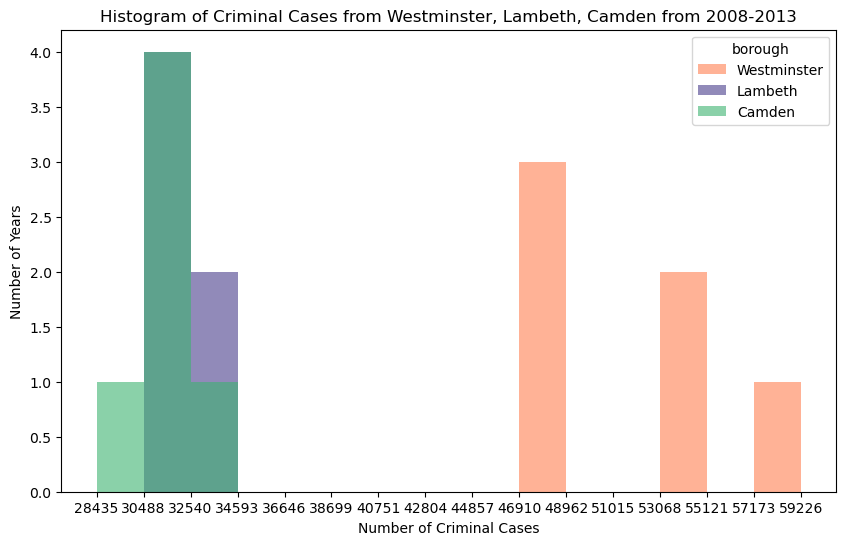

In [112]:
ht1_top3.plot(
    kind='hist',
    figsize=(10, 6),
    bins=bin_edges,
    alpha=0.6,
    xticks=bin_edges,
    color=['coral', 'darkslateblue', 'mediumseagreen']
)
plt.title('Histogram of Criminal Cases from Westminster, Lambeth, Camden from 2008-2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Criminal Cases')
plt.show()

Insight: Analyzing the histogram above, we can infer that the distribution of criminal cases in Westminster shows a tendency to be more dispersed compared to Lambeth and Camden.

### Bar Chart

Question: Create a horizontal bar plot showing the top 10 of total criminal cases in London for the period 2008 - 2016.

Create the required dataframe for the top 10 boroughs with the highest criminal cases

In [18]:
bc1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc='sum')
bc1['Total'] = bc1.sum(axis=1)
bc1.sort_values(by='Total', ascending=False, inplace=True)
bc1_top10 = bc1['Total'].head(10)
bc1_top10

borough
Westminster      455028
Lambeth          292178
Southwark        278809
Camden           275147
Newham           262024
Croydon          260294
Ealing           251562
Islington        230286
Tower Hamlets    228613
Brent            227551
Name: Total, dtype: int64

Create a horizontal bar plot for the top 10 boroughs

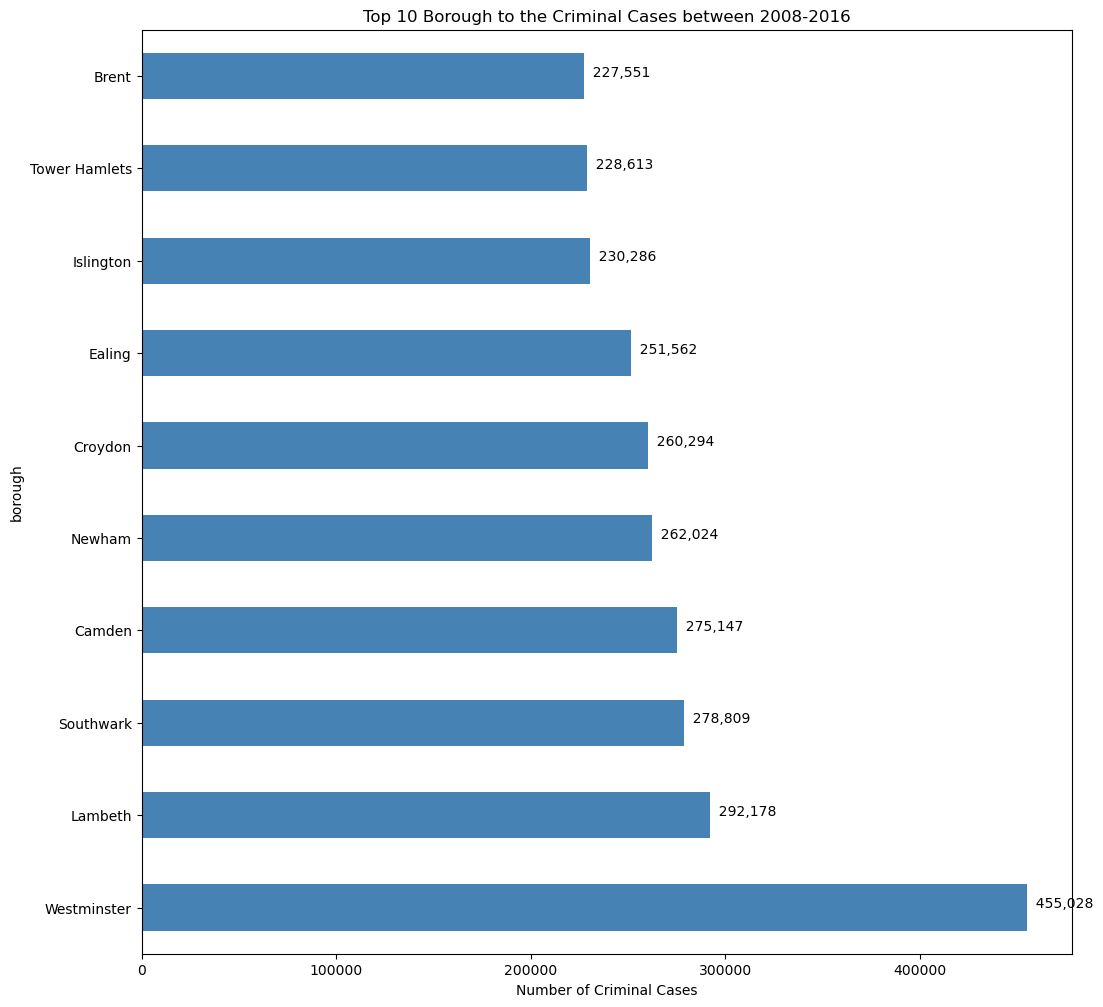

In [24]:
bc1_top10.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Criminal Cases')
plt.title('Top 10 Borough to the Criminal Cases between 2008-2016')

# Annotate the bar plot with values
for index, value in enumerate(bc1_top10):
    label = format(int(value), ',')  # Format int with commas
    plt.annotate(f'  {label}', xy=(value, index), color='black')
    
plt.show()

Insight: Based on the horizontal bar plot above, it's evident that Westminster has the highest total number of criminal cases, followed by Lambeth, Southwark, Camden, Newham, Croydon, Ealing, Islington, Tower Hamlets, and Brent, making them the top ten areas with the highest total criminal cases.

### Pie Chart

Question: How is the percentage of major and minor criminal category that occurs in London?

Create the required dataframes for the major and minor category pie charts

In [124]:
pc1 = df['major_category'].value_counts()
pc2 = df['minor_category'].value_counts()

Create pie chart for major category

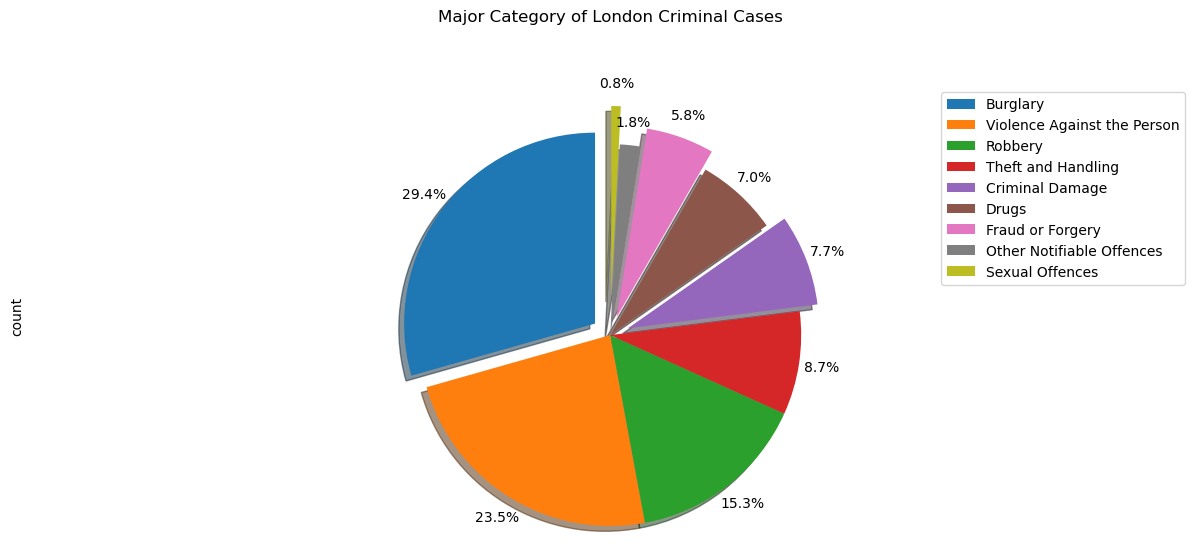

In [127]:
explode_list = [0.1, 0, 0, 0, 0.1, 0, 0.1, 0, 0.2] # ratio for each continent with which to offset each wedge.

pc1.plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%', 
    startangle=90,    
    shadow=True,       
    labels=None,         # turn off labels on pie chart
    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    explode=explode_list # 'explode' lowest 3 continents
    )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df['major_category'].unique(), loc='upper right')

plt.show()

Insight: According to the pie chart above, it's apparent that Burglary is the most frequently occurring major category at 29.4%, whereas Sex offenses represent the least frequent category at just 0.8%.

Create pie chart for minor category


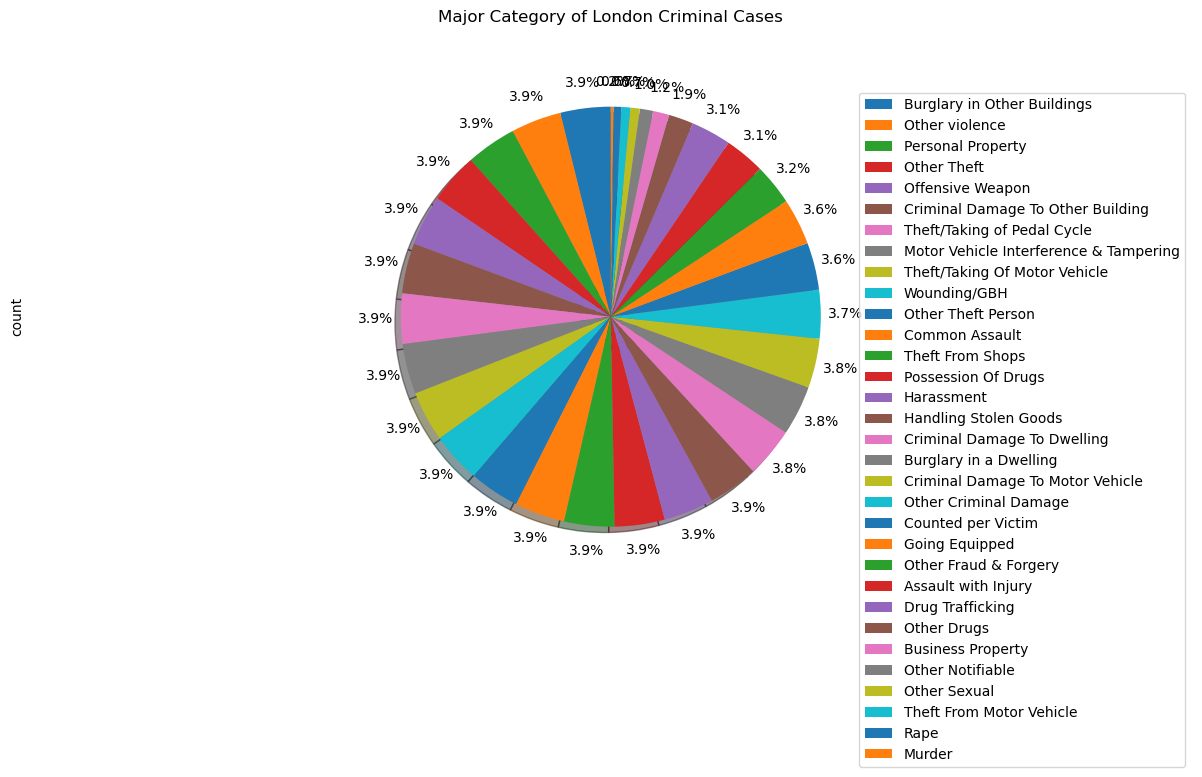

In [130]:
pc2.plot(
    kind='pie',
    figsize=(15, 6),
    autopct='%1.1f%%', 
    startangle=90,    
    shadow=True,       
    labels=None,         # turn off labels on pie chart
    pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
    )

# scale the title up by 12% to match pctdistance
plt.title('Major Category of London Criminal Cases', y=1.12) 
plt.axis('equal') 

# add legend
plt.legend(labels=df['minor_category'].unique(), loc='upper right') 

plt.show()

Insight: Based on the pie chart above, it's evident that the majority of minor categories appear in nearly identical percentages.

### Box Plot

Question: Create a box plot to visualize the distribution of total criminal cases in each year of Borough.

Create the required dataframe for the box plot

In [131]:
bp1 = df.pivot_table(index='borough', columns='year', values='value', aggfunc=sum)
bp1.head()

year,2008,2009,2010,2011,2012,2013,2014,2015,2016
borough,,,,,,,,,
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


Create a horizontal box plot

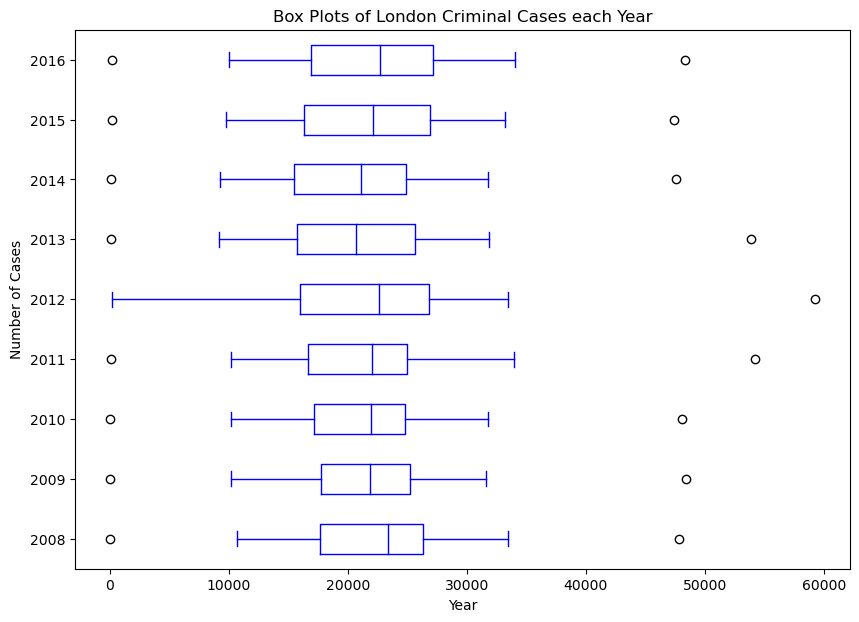

In [148]:
bp1.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box Plots of London Criminal Cases each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Insight: The box plot above indicates that the distribution of total criminal cases tends to remain consistent annually, but in 2012, there was a notably wider distribution. Additionally, outliers can be observed both at the upper and lower ends of the box plot range. This includes boroughs with zero cases as well as boroughs with exceptionally high case numbers every year.

### Scatter Plot

Question: Create a scatter plot of the London's total criminal cases in period 2008-2013

Create the required dataframe for the scatter plot

In [133]:
sp1 = df.pivot_table(index='year', columns='borough', values='value', aggfunc=sum)
sp1['Total'] = sp1.sum(axis=1)
sp11 = sp1[['Total']]
sp11.reset_index(inplace=True)
sp11

borough,year,Total
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


Make sure that Total column is correct

In [134]:
print('Total: ',sp1.Total.sum())
print('Value: ',df.value.sum())

Total:  6447758
Value:  6447758


Create a scatter plot

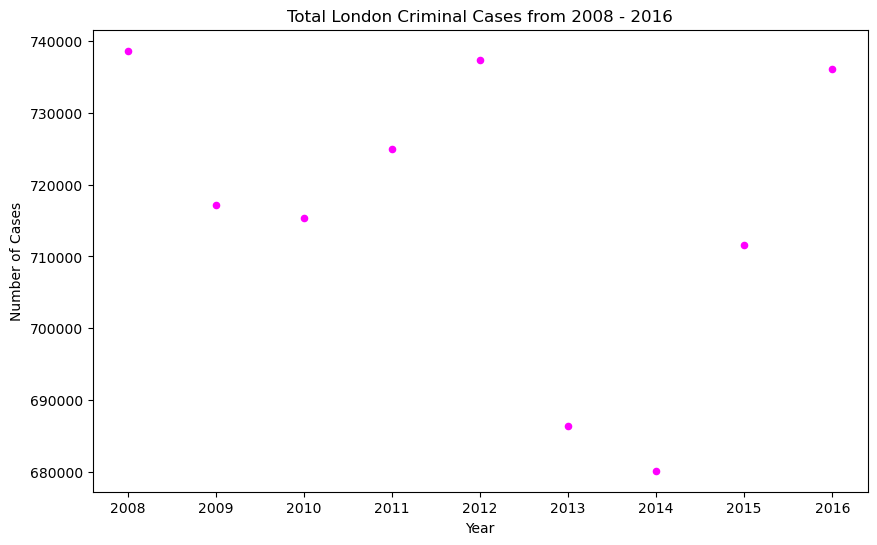

In [141]:
sp11.plot(kind='scatter', x='year', y='Total', figsize=(10, 6), color='magenta')

plt.title('Total London Criminal Cases from 2008 - 2016')
plt.xlabel('Year')
plt.ylabel('Number of Cases')

plt.show()

Insight: Based on the scatter plot above, it can be concluded that there is not a very significant difference between the years.

### Word Clouds

Question: What words of major categories that often appear in criminal cases in London?

Create a list of major categories

In [35]:
wc1 = df['major_category']

Combine the major category text

In [151]:
london_mask = np.array(Image.open('londonmask.png'))
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

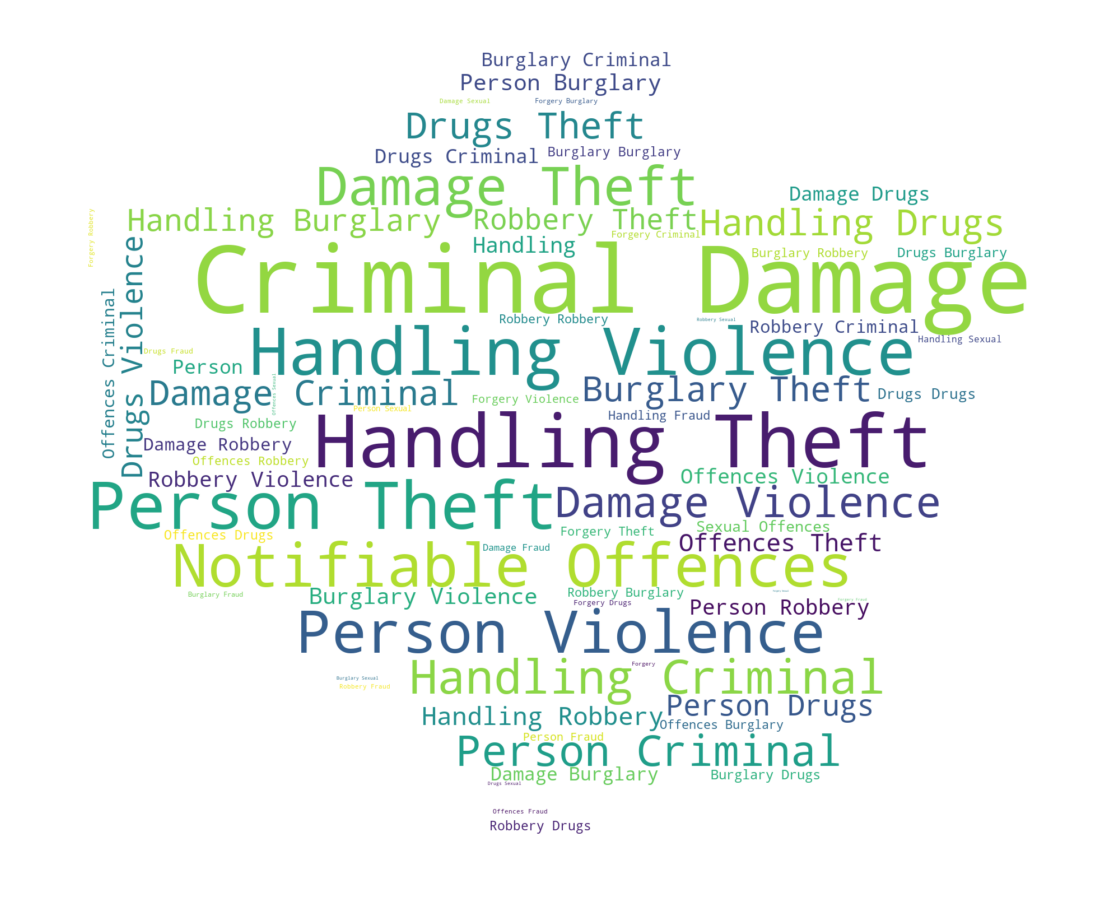

In [155]:
# instantiate a word cloud object
london_wc = WordCloud(
    background_color='white',
    mask=london_mask,
    max_words=200,
    stopwords=STOPWORDS,
)

# generate the word cloud
london_wc.generate(' '.join(wc1.values))

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(london_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Insight: The word clouds above reveal that words like "Criminal," "Damage," "Handling," and "Theft" have the largest font size, indicating their frequent occurrence in major category criminal cases.

### Folium Maps

Question: Create a Folium Map of London

Define the world map centered around London with a 9 zoom level

In [39]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=9)

world_map

Create a Stamen Toner map of the world centered around London

In [40]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Toner')

world_map

Create a Stamen Terrain map of the world centered around London

In [113]:
world_map = folium.Map(location=[51.50209939078944, -0.12486231307153765], zoom_start=13, tiles='Stamen Terrain')

world_map

Get a list of the top 10 boroughs with the highest total criminal cases


In [170]:
top_boroughs = df.groupby('borough')['value'].sum().nlargest(10).index

for i in top_boroughs:
    print (i)

Westminster
Lambeth
Southwark
Camden
Newham
Croydon
Ealing
Islington
Tower Hamlets
Brent


London's geographical location with additional  10 boroughs with the highest total criminal cases location marker


In [178]:
# Create a Folium map centered around London
london_map = folium.Map(location=[51.509865, -0.118092], zoom_start=9)
london_map

# Add markers for the top 10 boroughs
for borough in top_boroughs:
    # Get the latitude and longitude for each borough (You need to have this data available)
        # You can replace the coordinates below with actual values for each borough
    if borough == 'Westminster':
        location = (51.5120, -0.1910)
    elif borough == 'Lambeth':
        location = (51.5013, -0.1173)
    elif borough == 'Southwark':
        location = (51.4834, -0.0821)
    elif borough == 'Camden':
        location = (51.5517, -0.1588)
    elif borough == 'Newham':
        location = (51.5255, 0.0352)
    elif borough == 'Croydon':
        location = (51.3762, -0.0982)
    elif borough == 'Ealing':
        location = (51.5127, -0.3059)
    elif borough == 'Islington':
        location = (51.5465, -0.1058)
    elif borough == 'Tower Hamlets':
        location = (51.5099, -0.0059)
    elif borough == 'Brent':
        location = (51.5635, -0.2674)

    
    # Add a marker for each borough with its name and the total criminal cases
    folium.Marker(location, 
                  popup=f"{borough}: {int(bc1_top10[borough])} cases",
                  icon=folium.Icon(icon="info-sign")
                 ).add_to(london_map)

# Display the map
london_map

Insight: The folium maps above provide a visualization of London's geographical locations, along with markers indicating the locations of the 10 boroughs with the highest total criminal cases.

---

Overall Analysis:

The data visualizations conducted on criminal cases in London from 2008 to 2013 provide insights into the diversity of criminal cases across various categories in the city. Notably, Burglary is the most frequently occurring category, and Westminster stands out as the borough with the highest number of cases. Furthermore, the annual data distribution remains relatively consistent over this period.